link https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients

tutek: https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8

In [2]:
import pandas as pd

In [3]:
#sprawdzenie bieżącej lokalizacji do odpowiedniego wskazania pliku CSV
import os
os.getcwd()

'C:\\Users\\Olo\\Praca_MGR'

In [5]:
#wczytuje dane do "data"
data = pd.read_csv('C:/Users/Olo/Desktop/Projekt/dane/DANE.csv', sep = ';')

In [6]:
#import potrzebnych bibliotek
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [9]:
corr_df = data.corr(method='pearson') #corr_df - macierz korelacji!
corr_df.columns.values

array(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1',
       'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
       'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
       'PAY_AMT6', 'Y'], dtype=object)

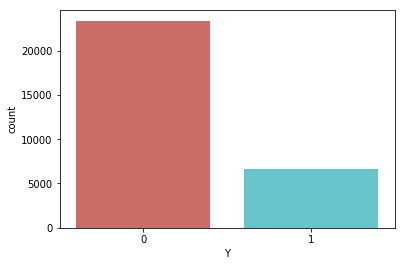

In [15]:
#print(list(data.columns)) - wylistowanie kolumn
data['EDUCATION'].unique() #UNIKALNE WARTOSCI
data['Y'].value_counts() #liczenie wolumeny pogrupowane po wart. Y
sns.countplot(x='Y',data=data, palette = 'hls')
plt.show() #mamy zdecydowanie wiecej przypadkow default = 0 <=> klient splaci swoje zobowiazanie

In [22]:
count_no_default = len(data[data.Y==0]) # data.Y = data["Y"] 
print('W badanym zbiorze default=0 stanowi',count_no_default/len(data),'%' ) #argumenty porozdzielane "," po print robi spacje miedzy argumentami i je wyświetla niezależnie od typu

W badanym zbiorze default=0 stanowi 0.7788 %


In [24]:
data.groupby("Y").mean()
#SEX 1=male: Zatem u mężczyzn występuje wyższe prawd. niespłacenia (Y=1)
#LIMIT_BAL (limit na karcie): problem Y=1 występuje u klientów, którzy mają mniejszy limit 
#PAY (zaległości ze spłatą -1 splata z nawiazka, 0, 1- opoznienie miesiac, 2- opoznienie 2 miesiace):
#PAY: zgodnie z rozsądkiem jeżeli klient zalega to bardziej prawdopodbna niespłata (Y=1)
#BILL_AMT = dług -> im mniejszy dług tym większe prawd. niespłacenia
#PAY_AMT (kwota spłaty) = zdecydowanie większe (prawie 2x) spłaty dla ludzi Y=0 

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
Y,,,,,,,,,,,,,,,,,,,,,
0,178099.726074,0.385850,1.841337,1.558637,35.417266,-0.211222,-0.301917,-0.316256,-0.355633,-0.389488,...,47533.365605,43611.165254,40530.445343,39042.268704,6307.337357,6640.465074,5753.496833,5300.529319,5248.220296,5719.371769
1,130109.656420,0.432942,1.894665,1.528029,35.725738,0.668174,0.458258,0.362116,0.254521,0.167872,...,45181.598855,42036.950573,39540.190476,38271.435503,3397.044153,3388.649638,3367.351567,3155.626733,3219.139542,3441.482068


In [25]:
data.groupby("EDUCATION").mean() #5,6 - co to jest? zweryfikować

,LIMIT_BAL,SEX,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Y
EDUCATION,,,,,,,,,,,,,,,,,,,,,
0,217142.857143,0.571429,1.714286,38.857143,-0.500000,-1.000000,-0.928571,-0.857143,-1.071429,-1.357143,...,13350.214286,7409.071429,5272.928571,5945.785714,13030.928571,8825.142857,3620.571429,2541.714286,3007.214286,0.000000
1,212956.069910,0.411337,1.652338,34.231838,-0.233916,-0.408125,-0.425886,-0.461974,-0.479074,-0.485971,...,42931.065187,40388.891261,38668.076051,6780.933585,7306.622201,6560.585735,5804.565612,5776.562211,6422.554842,0.192348
2,147062.437634,0.383036,1.523022,34.722096,0.102210,0.022523,-0.018532,-0.083036,-0.141411,-0.170848,...,44748.779758,41588.566287,40431.943835,5080.463293,5106.711333,4556.800000,4375.387313,4452.678689,4716.487028,0.237349
3,126550.270490,0.404718,1.421192,40.299980,0.132805,0.040879,0.002644,-0.066504,-0.139313,-0.183649,...,38718.582266,35957.469392,34704.597315,4866.397397,5053.454139,3964.056742,3992.658532,3599.658938,3825.749034,0.251576
4,220894.308943,0.341463,1.601626,33.853659,-0.504065,-0.772358,-0.764228,-0.813008,-0.780488,-0.739837,...,39570.268293,33840.113821,32136.130081,5450.512195,6555.008130,9990.626016,5104.861789,5991.642276,4284.967480,0.056911
5,168164.285714,0.339286,1.475000,35.600000,-0.121429,-0.303571,-0.375000,-0.375000,-0.389286,-0.521429,...,62275.767857,53568.014286,46083.860714,5970.714286,8912.921429,7718.510714,4927.332143,4633.246429,7772.114286,0.064286
6,148235.294118,0.490196,1.490196,43.901961,-0.176471,-0.313725,-0.372549,-0.411765,-0.509804,-0.647059,...,54259.490196,44510.745098,39578.509804,9780.450980,6176.431373,7644.941176,5179.490196,11691.137255,14773.901961,0.156863


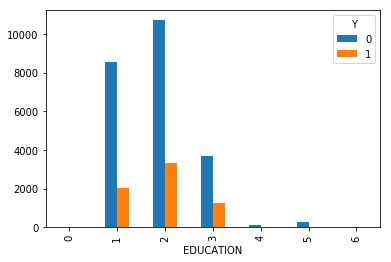

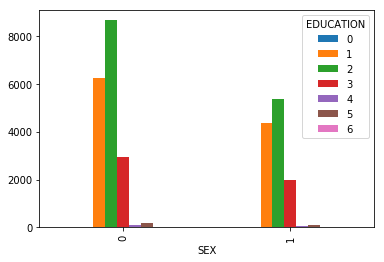

In [31]:
#jak się ma edukacja do prawd. Y ? Niewiele tu widać -> wygląda to bardzo podobnnie dla każdej kategorii edukacji
%matplotlib inline
pd.crosstab(data.EDUCATION , data.Y).plot(kind='bar')
pd.crosstab( data.SEX, data.EDUCATION ).plot(kind='bar')
plt.show()

In [33]:
#surowe wartości matrixa Education - Y
table = pd.crosstab(data.EDUCATION, data.Y)
#print(type(table))
table.head(50)

Y,0,1
EDUCATION,,
0,14,0
1,8549,2036
2,10700,3330
3,3680,1237
4,116,7
5,262,18
6,43,8


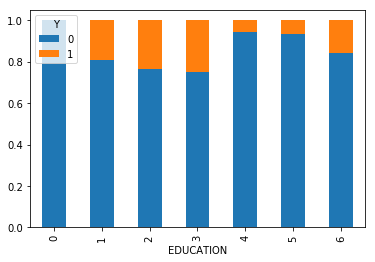

In [35]:
#EDUCATION (1- absolwent, 2- student, 3- liceum, 4- inne, 5,6??)
#majgorsi studenci i liceum
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked= True)

In [40]:
tabl1 =  table.div(table.sum(1), axis=0) #operacja na calym DataFrame (ile %)
# jaka suma ? : table.sum(1)
tab1['Volume'] = table.sum(1)
tab1
#3- high school - slabo

Y,0,1,Volume
EDUCATION,,,
0,1.000000,0.000000,14
1,0.807652,0.192348,10585
2,0.762651,0.237349,14030
3,0.748424,0.251576,4917
4,0.943089,0.056911,123
5,0.935714,0.064286,280
6,0.843137,0.156863,51


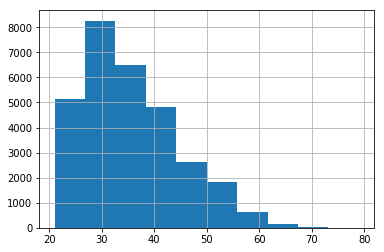

In [55]:
#histogram -> 20-45 lat najliczniejsza grupa
data.AGE.hist()
#data.LIMIT_BAL.hist()
#data.EDUCATION.hist()

In [62]:
import math

In [124]:
def RoundTo500 (x , Round = 500):
    x1 = str(x).replace(',','.')
    y  = float(x1)/Round
    return math.ceil(y)*Round  

In [127]:
RoundTo500('53,53',1000)

1000

In [143]:
#data.PAY_AVG.apply(RoundTo500, args = [10000]) 
#zostawiam na przyszlosc -> moze sie przydac do tworzenia przedziałów

In [144]:
data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT6,BILL_AMT_AVG,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,PAY_AVG,Y
0,20000,0,2,1,24,2,2,-1,-1,-2,...,0,1284,0,689,0,0,0,0,"114,8333333",1
1,120000,0,2,2,26,-1,2,0,0,0,...,3261,"2846,166667",0,1000,1000,1000,0,2000,"833,3333333",1
2,90000,0,2,2,34,0,0,0,0,0,...,15549,"16942,16667",1518,1500,1000,1000,1000,5000,"1836,333333",0
3,50000,0,2,1,37,0,0,0,0,0,...,29547,"38555,66667",2000,2019,1200,1100,1069,1000,1398,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,19131,"18223,16667",2000,36681,10000,9000,689,679,"9841,5",0


In [155]:
kol_konw = [['BILL_AMT_AVG'], ['PAY_AVG']]

In [187]:
kol_konw

[['BILL_AMT_AVG'], ['PAY_AVG']]

In [185]:
#konwersja stringow typu '564,54' na 565.54
for x in kol_konw:
    #squeeze -> convert from dataframe to series
    data[x] = data[x].squeeze().str.replace(',','.')


In [150]:
data.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'BILL_AMT_AVG',
       'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'PAY_AVG', 'Y'],
      dtype='object')

In [186]:
#chce widziec wszystkie kolumny, zatem:
pd.set_option('display.max_column', None)
data.head(10)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,BILL_AMT_AVG,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,PAY_AVG,Y
0,20000,0,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,1284,0,689,0,0,0,0,114.8333333,1
1,120000,0,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,2846.166667,0,1000,1000,1000,0,2000,833.3333333,1
2,90000,0,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,16942.16667,1518,1500,1000,1000,1000,5000,1836.333333,0
3,50000,0,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,38555.66667,2000,2019,1200,1100,1069,1000,1398,0
4,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,18223.16667,2000,36681,10000,9000,689,679,9841.5,0
5,50000,1,1,2,37,0,0,0,0,0,0,64400,57069,57608,19394,19619,20024,39685.66667,2500,1815,657,1000,1000,800,1295.333333,0
6,500000,1,1,2,29,0,0,0,0,0,0,367965,412023,445007,542653,483003,473944,454099.1667,55000,40000,38000,20239,13750,13770,30126.5,0
7,100000,0,2,2,23,0,-1,-1,0,0,-1,11876,380,601,221,-159,567,2247.666667,380,601,0,581,1687,1542,798.5,0
8,140000,0,3,1,28,0,0,2,0,0,0,11285,14096,12108,12211,11793,3719,10868.66667,3329,0,432,1000,1000,1000,1126.833333,0
9,20000,1,3,2,35,-2,-2,-2,-2,-1,-1,0,0,0,0,13007,13912,4486.5,0,0,0,13007,1122,0,2354.833333,0


In [188]:
data.MARRIAGE.unique()

array([1, 2, 3, 0], dtype=int64)

In [209]:
#Rozbicie zmiennych jakościowych na zmienne dyskretne
zmienne_jakosciowe = ['EDUCATION','MARRIAGE']
for zmienna in zmienne_jakosciowe:
    cat_list = pd.get_dummies(data[zmienna], prefix=zmienna) #prefix var 
    data = data.join(cat_list)

data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,BILL_AMT_AVG,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,PAY_AVG,Y,EDUCATION_0,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,MARRIAGE_0,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
0,20000,0,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,1284,0,689,0,0,0,0,114.8333333,1,0,0,1,0,0,0,0,0,1,0,0
1,120000,0,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,2846.166667,0,1000,1000,1000,0,2000,833.3333333,1,0,0,1,0,0,0,0,0,0,1,0
2,90000,0,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,16942.16667,1518,1500,1000,1000,1000,5000,1836.333333,0,0,0,1,0,0,0,0,0,0,1,0
3,50000,0,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,38555.66667,2000,2019,1200,1100,1069,1000,1398,0,0,0,1,0,0,0,0,0,1,0,0
4,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,18223.16667,2000,36681,10000,9000,689,679,9841.5,0,0,0,1,0,0,0,0,0,1,0,0


In [214]:
data_vars = data.columns.values.tolist()
to_keep =[i for i in data_vars if i not in zmienne_jakosciowe]
to_keep #eliminuje te ktore zostaly wykorzystane do stworzenia zmiennych dyskretnych!
data = data[to_keep]


In [215]:
# to jakos ciekawostka zostawiam: 
p1 = pd.Series(list('Aleksander'))
pd.get_dummies(p1)

,A,a,d,e,k,l,n,r,s
0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0
2,0,0,0,1,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,1
5,0,1,0,0,0,0,0,0,0
6,0,0,0,0,0,0,1,0,0
7,0,0,1,0,0,0,0,0,0
8,0,0,0,1,0,0,0,0,0
9,0,0,0,0,0,0,0,1,0


In [ ]:
#SAMLOWANIE SMOTE (RADZIMY SOBIE Z MAŁĄ ILOSCIA Y=1)

In [229]:
X = data.loc[:,data.columns != 'Y']
Y = data.loc[:,data.columns == "Y"]

In [238]:
from  imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [249]:
os = SMOTE(random_state=0)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=0)
columns = X_train.columns

os_data_X,os_data_Y = os.fit_sample(X_train, Y_train.Y)
os_data_X = pd.DataFrame(data=os_data_X, columns=columns)
os_data_Y = pd.DataFrame(data=os_data_Y, columns= ['Y'])

#jak teraz jest z liczebnośćią? Sprawdzmy
print('Liczebnosc X to', len(os_data_X))
print('Liczebnosc Y to', len(os_data_Y))



Liczebnosc X to 32608
Liczebnosc Y to 32608


In [265]:
os_data_Y.sum(0) #polowa rowno

Y    16304
dtype: int64

In [267]:
Y= ['Y']
X= [X_train.columns]

In [284]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
rfe =RFE(logreg,20)
rfe = rfe.fit(os_data_X, os_data_Y.values.ravel())

d:\program files (x86)\python\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
d:\program files (x86)\python\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
d:\program files (x86)\python\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
d:\program files (x86)\python\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
d:\program files (x86)\python\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Spec

AttributeError: 'RFE' object has no attribute 'support'

In [289]:
features_bool = np.array(rfe.support_)
features = np.array(os_data_X.columns)
result = features[features_bool]


['SEX' 'AGE' 'PAY_0' 'PAY_2' 'PAY_3' 'PAY_4' 'PAY_5' 'PAY_6' 'PAY_AVG'
 'EDUCATION_0' 'EDUCATION_1' 'EDUCATION_2' 'EDUCATION_3' 'EDUCATION_4'
 'EDUCATION_5' 'EDUCATION_6' 'MARRIAGE_0' 'MARRIAGE_1' 'MARRIAGE_2'
 'MARRIAGE_3']


In [292]:
X = os_data_X[result]
Y = os_data_Y['Y']

In [293]:
import statsmodels.api as sm
logit_model = sm.Logit(Y,X)
result = logit_model.fit()
print(result.summary2())

         Current function value: 0.600714
         Iterations: 35
                             Results: Logit
Model:                  Logit              Pseudo R-squared:   0.133     
Dependent Variable:     Y                  AIC:                39214.1590
Date:                   2019-09-29 16:55   BIC:                39373.6129
No. Observations:       32608              Log-Likelihood:     -19588.   
Df Model:               18                 LL-Null:            -22602.   
Df Residuals:           32589              LLR p-value:        0.0000    
Converged:              0.0000             Scale:              1.0000    
No. Iterations:         35.0000                                          
-------------------------------------------------------------------------
             Coef.     Std.Err.     z     P>|z|     [0.025       0.975]  
-------------------------------------------------------------------------
SEX           0.1530      0.0265   5.7783 0.0000       0.1011      0.2048
AG

d:\program files (x86)\python\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [294]:
#usuwam kolumny gdzie p value jest wysokie
cols = ['SEX','AGE','PAY_0','PAY_2','PAY_3','PAY_AVG']
X = X[cols]

logit_model = sm.Logit(Y,X)
result = logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.604721
         Iterations 6
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.128     
Dependent Variable: Y                AIC:              39449.4889
Date:               2019-09-29 17:03 BIC:              39499.8428
No. Observations:   32608            Log-Likelihood:   -19719.   
Df Model:           5                LL-Null:          -22602.   
Df Residuals:       32602            LLR p-value:      0.0000    
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
------------------------------------------------------------------
              Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
------------------------------------------------------------------
SEX           0.1248    0.0261    4.7840  0.0000   0.0737   0.1760
AGE           0.0026    0.0005    5.1004  0.0000   0.0016   0.

In [296]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = .3 , random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

d:\program files (x86)\python\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [297]:
y_pred = logreg.predict(X_test)
print('Dokladnosc regresji logistycznej na próbie testowej wynosi: {:.2f}' .format(logreg.score(X_test,Y_test)))

Dokladnosc regresji logistycznej na próbie testowej wynosi: 0.69


In [301]:
confusion_matrix = metrics.confusion_matrix(Y_test, y_pred)
print(confusion_matrix)
# mowi nam to ze 3394 + 1470 dobrych predykcji
# 1581 + 3338 zlych predykcji

[[3394 1470]
 [1581 3338]]
